### Pseudo-code to run the notebook

1.   Run function "download_dataset_to_collab()" to download dataset to collab env
2.   Check data is downloaded to train, train_cleaned, test dir using the "Bash script to move data dir" cell
3.   Apply background removal to images dir - train & test using median filter function "apply_background_removal(imgdir_path)"
4.   Split the dataset per image resolution using the "Bash script to move data dir" cell
5.   Generate numpy arrays for train/test/train_cleaned folders using function "img2nparray(path)"
6.   Run training using the generated np arrays X_train, y_train, x_test (model shall save weigths automatically,  comment out load weights in 1st run)
7.   Run prediction in immediately following cell & see sample ouputs in next cell
8.   Copy list of png files for x_test from step#5 & make a list as 'x_test_list' in cell "Convert numpy array to csv with image index"
9.   Run the cell "Convert numpy array to csv with image index"
10. Repeat steps#5-9 for train_small, train_cleaned_small, test_small 
11. save the generated csv to gdrive using "save_file_to_drive()"
12. Download, concatenate the csv, set header as "id,value" & submit

_Massive cleanup of the notebook under-progress but the network training was running longer hence debugging & leaving the notebook minimally edited. please bear with me_

---
[Kaggle submissions screenshot](https://github.com/kapsdeep/Kaggle-Denoise-Dirty-Documents/blob/master/Screen%20Shot%202018-06-30%20at%201.58.06%20PM.png)


In [0]:
'''
  Convert numpy array to csv with image index
'''
import csv

#x_test_list is based on o/p of img2np function hence changes everytime based on sequence of processing images
x_test_list=[43,31,1,67,13,55,37,28,46,52,4,16,64,49,25,19,34,40,61,10,70,58,7,22]

op_array = decoded_imgs
op_file = 'median_cnn200epoch_258_540'

print(op_array.shape)

for n in range(op_array.shape[0]):
  for row in range(op_array.shape[1]):
    for col in range(op_array.shape[2]):
      with open(str(op_file)+'.csv', 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
#         writer.writerow( [ str(f.split('.')[0])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(img[index[0],index[1]]) ] )
        writer.writerow( [ str(x_test_list[n])+'_'+str(row+1)+'_'+str(col+1) ] + [ str(op_array[n,row,col,0]) ] )
#       print('{}_{}_{},{}'.format(x_test_list[n],row+1,col+1,x_test1[n,row,col,0]))

(24, 258, 540, 1)


In [4]:
'''
  Bash script to move data dir
'''

#Check if your runtime is GPU accelerated or not
from tensorflow.python.client import device_lib
hw = device_lib.list_local_devices()
#print(hw)
if "GPU" in str(hw):
  print("Your runtime is GPU accelerated")
else:
  print("Change runtime to GPU accelerated")
!ls
!ls datalab
!ls datalab_orig/

# Backup training/test dataset
# !mkdir datalab_orig
# !cp -rf datalab/* datalab_orig/

# Split the dataset per image resolution (420x540 to train & 258x540 to train_small, repeat for all others)
# !mkdir datalab/test_small
# !mkdir datalab/train_small
# !mkdir datalab/train_cleaned_small
# !mv datalab/test/49.png datalab/test/61.png datalab/test/70.png datalab/test/64.png datalab/test/58.png datalab/test/67.png datalab/test/28.png datalab/test/16.png datalab/test/13.png datalab/test/10.png datalab/test/34.png datalab/test/22.png datalab/test/37.png datalab/test/25.png datalab/test/31.png datalab/test/19.png datalab/test/4.png datalab/test/43.png datalab/test/55.png datalab/test/7.png datalab/test/40.png datalab/test/1.png datalab/test/46.png datalab/test/52.png -t datalab/test_small
# !mv datalab/train_cleaned/63.png datalab/train_cleaned/62.png datalab/train_cleaned/60.png datalab/train_cleaned/48.png datalab/train_cleaned/59.png datalab/train_cleaned/65.png datalab/train_cleaned/71.png datalab/train_cleaned/8.png datalab/train_cleaned/72.png datalab/train_cleaned/66.png datalab/train_cleaned/9.png datalab/train_cleaned/14.png datalab/train_cleaned/29.png datalab/train_cleaned/15.png datalab/train_cleaned/17.png datalab/train_cleaned/12.png datalab/train_cleaned/39.png datalab/train_cleaned/11.png datalab/train_cleaned/38.png datalab/train_cleaned/35.png datalab/train_cleaned/21.png datalab/train_cleaned/20.png datalab/train_cleaned/36.png datalab/train_cleaned/23.png datalab/train_cleaned/27.png datalab/train_cleaned/33.png datalab/train_cleaned/32.png datalab/train_cleaned/26.png datalab/train_cleaned/18.png datalab/train_cleaned/30.png datalab/train_cleaned/24.png datalab/train_cleaned/56.png datalab/train_cleaned/42.png datalab/train_cleaned/5.png datalab/train_cleaned/57.png datalab/train_cleaned/41.png datalab/train_cleaned/69.png datalab/train_cleaned/68.png datalab/train_cleaned/54.png datalab/train_cleaned/6.png datalab/train_cleaned/44.png datalab/train_cleaned/2.png datalab/train_cleaned/50.png datalab/train_cleaned/3.png datalab/train_cleaned/51.png datalab/train_cleaned/45.png datalab/train_cleaned/53.png datalab/train_cleaned/47.png -t datalab/train_cleaned_small
# !mv datalab/train/63.png datalab/train/62.png datalab/train/60.png datalab/train/48.png datalab/train/59.png datalab/train/65.png datalab/train/71.png datalab/train/8.png datalab/train/72.png datalab/train/66.png datalab/train/9.png datalab/train/14.png datalab/train/29.png datalab/train/15.png datalab/train/17.png datalab/train/12.png datalab/train/39.png datalab/train/11.png datalab/train/38.png datalab/train/35.png datalab/train/21.png datalab/train/20.png datalab/train/36.png datalab/train/23.png datalab/train/27.png datalab/train/33.png datalab/train/32.png datalab/train/26.png datalab/train/18.png datalab/train/30.png datalab/train/24.png datalab/train/56.png datalab/train/42.png datalab/train/5.png datalab/train/57.png datalab/train/41.png datalab/train/69.png datalab/train/68.png datalab/train/54.png datalab/train/6.png datalab/train/44.png datalab/train/2.png datalab/train/50.png datalab/train/3.png datalab/train/51.png datalab/train/45.png datalab/train/53.png datalab/train/47.png -t datalab/train_small

Your runtime is GPU accelerated
datalab
adc.json  test	train  train_cleaned


In [0]:
'''
Calculate #layers using receptive field
'''
import math
import numpy as np

convnet=np.array([[3,1,2],[3,1,2],[1,1,0],[3,1,2],[3,1,2],[3,1,2],[1,1,0],[2,1,2]])
layer_names = ['conv1','conv2','dropout1','conv3','conv4','conv5','dropout2','pool1']
imsize = 540

def calc_op_param(n, r, j):
  for x in range(convnet.shape[0]):
    n=((n-(convnet[x][0])+(2*convnet[x][2]))/convnet[x][1])+1
    r=r+((convnet[x][0])-1)*j
    j=j*convnet[x][1]
    print('layer#',x,'n_out:',n,'r_out:',r,'j_out:',j)

# input layer has following parameters
n_in=imsize
r_in=1         #receptive field is whole image for input layer
j_in=1
start_in=0.5
print(convnet.shape[0])
print(convnet[0][0])

calc_op_param(n_in, r_in, j_in)

8
3
layer# 0 n_out: 542.0 r_out: 3 j_out: 1
layer# 1 n_out: 544.0 r_out: 5 j_out: 1
layer# 2 n_out: 544.0 r_out: 5 j_out: 1
layer# 3 n_out: 546.0 r_out: 7 j_out: 1
layer# 4 n_out: 548.0 r_out: 9 j_out: 1
layer# 5 n_out: 550.0 r_out: 11 j_out: 1
layer# 6 n_out: 550.0 r_out: 11 j_out: 1
layer# 7 n_out: 553.0 r_out: 12 j_out: 1


In [1]:
def download_dataset_to_collab(dataset):
  '''
  Google Drive is a tag-based (also called semantic) file system, which, for example, allows a file to be in several places at the same time 
  (just by adding IDs of folders to the file's parents property)
  Hence to get the file/folder ID, navigate to the folder using browser & note the ID from URL 
  Ex: https://drive.google.com/drive/folders/1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO
  '''
  #Code to download files from google drive to collab using Pydrive

  !pip install -U -q PyDrive

  from pydrive.auth import GoogleAuth
  from pydrive.drive import GoogleDrive
  from google.colab import auth
  from oauth2client.client import GoogleCredentials
  import time

  # 1. Authenticate and create the PyDrive client.
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  # Auto-iterate through all files in the folder ID.
  start = time.time()
  for key, value in dataset.items():
    print("Initiating files copy from {} ...".format(key))
    file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(value)}).GetList()      #file_list = drive.ListFile({'q': "'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F' in parents and trashed=false"}).GetList()
    for file1 in file_list:      
      file6 = drive.CreateFile({'id': file1['id']}) # Initialize GoogleDriveFile instance with file id.
      file6.GetContentFile(file1['title'])          # Download file as file1['title']
    !mkdir 'datalab/'$key                           # move the data to folder in dictionary
    !ls -l datalab/
    !mv *.png 'datalab/'$key
    !ls -l datalab/
    print("Completed files copy from {}.".format(key))

  end = time.time()                                                                
  return 'time taken:'+ str(end-start) +'seconds'

dataset = {
          #'<folder_name>':'<gdrive_folder_id>'
          'train':'1mZVxppM8dHFcoKdc9Vu9vS-n_GGnpCkO', 
          'test':'1czmCOb4w0LiWetvQyhIxi6gGvJuAYb5F',
          'train_cleaned':'1T4uCpfZueGsSUCu145FuEcPY_he6A2fQ'
          }
download_dataset_to_collab(dataset)

Initiating files copy from train ...
total 8
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08:39 train
total 8
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08:39 train
Completed files copy from train.
Initiating files copy from test ...
total 12
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08:40 test
drwxr-xr-x 2 root root 4096 Jun 30 08:39 train
total 12
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08:41 test
drwxr-xr-x 2 root root 4096 Jun 30 08:39 train
Completed files copy from test.
Initiating files copy from train_cleaned ...
total 16
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08:41 test
drwxr-xr-x 2 root root 4096 Jun 30 08:39 train
drwxr-xr-x 2 root root 4096 Jun 30 08:42 train_cleaned
total 16
-rw-r--r-- 1 root root 2171 Jun 30 08:37 adc.json
drwxr-xr-x 2 root root 4096 Jun 30 08

'time taken:334.1182198524475seconds'

In [0]:
import numpy as np
from scipy import signal
from PIL import Image
from matplotlib import pyplot as plt
import os

class median_filter_and_thresholding():
  """
  Simple background removal code

  __author__ : Rangel Dokov

  The basic idea is that we have a foreground object of interest (the dark text)
  and we want to remove everything that is not part of this foreground object.

  This should produce results somewhere around 0.06 on the leaderboard.
  """

  def load_image(self, path):
    return np.asarray(Image.open(path))/255.0

  def save(self, path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)

  def denoise_image(self, inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)
    self.save('background.png', bg)

    # thresholding: compute 'foreground' mask as anything that is significantly darker than the background
    mask = inp < bg - 0.1
    self.save('foreground_mask.png', mask)

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

In [3]:
'''
  Function to apply background removal to img dir & save to current path
'''
def apply_background_removal(imgdir_path):
  m = median_filter_and_thresholding()  
  for f in os.listdir(imgdir_path):
    inp_path=imgdir_path+str(f)
    inp = m.load_image(inp_path)
    out = m.denoise_image(inp)
    out_path = f
    m.save(out_path, out)  

!ls 
!ls datalab
# apply background removal & move images to source dir
apply_background_removal('/content/datalab/test/')
!rm background.png foreground_mask.png
!mv *.png datalab/test/

# apply background removal & move images to source dir
apply_background_removal('/content/datalab/train/')
!rm background.png foreground_mask.png
!mv *.png datalab/train/

datalab
adc.json  test	train  train_cleaned


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPooling2D, UpSampling2D, AveragePooling2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU, ThresholdedReLU
from keras import backend as K
from keras.callbacks import TensorBoard

input_img = Input(shape=(258, 540, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(8, (3, 3), activation='relu', use_bias=True, padding='same')(input_img)
x = Conv2D(16, (3, 3), activation='relu', use_bias=True, padding='same')(x)
# x = Dropout(0.1)(x)
x = Conv2D(32, (3, 3), activation='relu', use_bias=True, padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', use_bias=True, padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', use_bias=True, padding='same')(x)
x = Dropout(0.1)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(128, (3, 1), activation='relu', use_bias=True, padding='same')(encoded)
x = Conv2D(128, (1, 3), activation='relu', use_bias=True, padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', use_bias=True, padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', use_bias=True, padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', use_bias=True, padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', use_bias=True, padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop', loss='mse')
autoencoder.summary()
autoencoder.load_weights('my_model_weights.h5')
autoencoder.fit(X_train, y_train,
            epochs=200,
            batch_size=4,
            shuffle=True,
            #validation_data=(X_train, y_train),
            callbacks=[TensorBoard(log_dir='/content/tb', histogram_freq=0, write_graph=False)]
            )
autoencoder.save_weights('my_model_weights.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 258, 540, 1)       0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 258, 540, 8)       80        
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 258, 540, 16)      1168      
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 258, 540, 32)      4640      
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 258, 540, 64)      18496     
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 258, 540, 128)     73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 258, 540, 128)     0         
__________

48/48 [==============================] - 6s 120ms/step - loss: 0.0020
Epoch 4/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0019
Epoch 5/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0020
Epoch 6/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0018
Epoch 7/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0018
Epoch 8/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0019
Epoch 9/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0016
Epoch 10/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0018
Epoch 11/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0016
Epoch 12/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0017
Epoch 13/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0017
Epoch 14/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 15/200
48/48 [===

48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 17/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 18/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 19/200
48/48 [==============================] - 6s 121ms/step - loss: 0.0015
Epoch 20/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 21/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 22/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0016
Epoch 23/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 24/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 25/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 26/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 27/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0015
Epoch 28/200
48/4

48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 30/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 31/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 32/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 33/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 34/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 35/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 36/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 37/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0014
Epoch 38/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 39/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 40/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 41/200
48/4

48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 43/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 44/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 45/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 46/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 47/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 48/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 49/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 50/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 51/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 52/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 53/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 54/200
48/4

48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 56/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 57/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 58/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 59/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 60/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 61/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 62/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0013
Epoch 63/200
48/48 [==============================] - 6s 120ms/step - loss: 9.5206e-04
Epoch 64/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 65/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 66/200
48/48 [==============================] - 6s 120ms/step - loss: 9.8823e-04
Epoch 67/

48/48 [==============================] - 6s 120ms/step - loss: 9.9530e-04
Epoch 69/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0012
Epoch 70/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 71/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 72/200
48/48 [==============================] - 6s 120ms/step - loss: 9.6984e-04
Epoch 73/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 74/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 75/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 76/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 77/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 78/200
48/48 [==============================] - 6s 120ms/step - loss: 9.3306e-04
Epoch 79/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch

48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 82/200
48/48 [==============================] - 6s 120ms/step - loss: 9.4914e-04
Epoch 83/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 84/200
48/48 [==============================] - 6s 120ms/step - loss: 9.4788e-04
Epoch 85/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 86/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 87/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 88/200
48/48 [==============================] - 6s 120ms/step - loss: 9.9529e-04
Epoch 89/200
48/48 [==============================] - 6s 120ms/step - loss: 9.2940e-04
Epoch 90/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0011
Epoch 91/200
48/48 [==============================] - 6s 120ms/step - loss: 9.4071e-04
Epoch 92/200
48/48 [==============================] - 6s 120ms/step - loss: 9.51

48/48 [==============================] - 6s 120ms/step - loss: 8.6859e-04
Epoch 95/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 96/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 97/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 98/200
48/48 [==============================] - 6s 120ms/step - loss: 8.1402e-04
Epoch 99/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 100/200
48/48 [==============================] - 6s 120ms/step - loss: 9.9103e-04
Epoch 101/200
48/48 [==============================] - 6s 120ms/step - loss: 8.5593e-04
Epoch 102/200
48/48 [==============================] - 6s 120ms/step - loss: 0.0010
Epoch 103/200
48/48 [==============================] - 6s 120ms/step - loss: 8.8927e-04
Epoch 104/200
48/48 [==============================] - 6s 120ms/step - loss: 8.9200e-04
Epoch 105/200
48/48 [==============================] - 6s 120ms/step - 

48/48 [==============================] - 6s 120ms/step - loss: 8.6140e-04
Epoch 108/200
48/48 [==============================] - 6s 120ms/step - loss: 8.9792e-04
Epoch 109/200
48/48 [==============================] - 6s 120ms/step - loss: 9.5981e-04
Epoch 110/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6920e-04
Epoch 111/200
48/48 [==============================] - 6s 120ms/step - loss: 9.4442e-04
Epoch 112/200
48/48 [==============================] - 6s 120ms/step - loss: 9.1584e-04
Epoch 113/200
48/48 [==============================] - 6s 120ms/step - loss: 9.3245e-04
Epoch 114/200
48/48 [==============================] - 6s 120ms/step - loss: 9.5109e-04
Epoch 115/200
48/48 [==============================] - 6s 120ms/step - loss: 8.9854e-04
Epoch 116/200
48/48 [==============================] - 6s 120ms/step - loss: 8.7103e-04
Epoch 117/200
48/48 [==============================] - 6s 120ms/step - loss: 9.2097e-04
Epoch 118/200
48/48 [=========================

Epoch 120/200
48/48 [==============================] - 6s 120ms/step - loss: 9.1404e-04
Epoch 121/200
48/48 [==============================] - 6s 120ms/step - loss: 8.8401e-04
Epoch 122/200
48/48 [==============================] - 6s 120ms/step - loss: 8.9722e-04
Epoch 123/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6612e-04
Epoch 124/200
48/48 [==============================] - 6s 120ms/step - loss: 9.4935e-04
Epoch 125/200
48/48 [==============================] - 6s 120ms/step - loss: 7.6427e-04
Epoch 126/200
48/48 [==============================] - 6s 120ms/step - loss: 9.0621e-04
Epoch 127/200
48/48 [==============================] - 6s 120ms/step - loss: 8.8407e-04
Epoch 128/200
48/48 [==============================] - 6s 120ms/step - loss: 8.5693e-04
Epoch 129/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6935e-04
Epoch 130/200
48/48 [==============================] - 6s 120ms/step - loss: 8.5424e-04
Epoch 131/200
48/48 [===========

48/48 [==============================] - 6s 120ms/step - loss: 8.3325e-04
Epoch 133/200
48/48 [==============================] - 6s 120ms/step - loss: 8.8758e-04
Epoch 134/200
48/48 [==============================] - 6s 120ms/step - loss: 8.3016e-04
Epoch 135/200
48/48 [==============================] - 6s 120ms/step - loss: 8.2963e-04
Epoch 136/200
48/48 [==============================] - 6s 120ms/step - loss: 9.0651e-04
Epoch 137/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6296e-04
Epoch 138/200
48/48 [==============================] - 6s 120ms/step - loss: 8.3053e-04
Epoch 139/200
48/48 [==============================] - 6s 120ms/step - loss: 8.4170e-04
Epoch 140/200
48/48 [==============================] - 6s 120ms/step - loss: 8.2639e-04
Epoch 141/200
48/48 [==============================] - 6s 120ms/step - loss: 8.0810e-04
Epoch 142/200
48/48 [==============================] - 6s 120ms/step - loss: 9.0720e-04
Epoch 143/200
48/48 [=========================

Epoch 145/200
48/48 [==============================] - 6s 120ms/step - loss: 8.5072e-04
Epoch 146/200
48/48 [==============================] - 6s 120ms/step - loss: 8.0915e-04
Epoch 147/200
48/48 [==============================] - 6s 120ms/step - loss: 9.1891e-04
Epoch 148/200
48/48 [==============================] - 6s 120ms/step - loss: 7.4000e-04
Epoch 149/200
48/48 [==============================] - 6s 120ms/step - loss: 8.4198e-04
Epoch 150/200
48/48 [==============================] - 6s 120ms/step - loss: 8.9013e-04
Epoch 151/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1774e-04
Epoch 152/200
48/48 [==============================] - 6s 120ms/step - loss: 8.7239e-04
Epoch 153/200
48/48 [==============================] - 6s 119ms/step - loss: 8.6012e-04
Epoch 154/200
48/48 [==============================] - 6s 120ms/step - loss: 7.7280e-04
Epoch 155/200
48/48 [==============================] - 6s 120ms/step - loss: 7.7552e-04
Epoch 156/200
48/48 [===========

48/48 [==============================] - 6s 120ms/step - loss: 8.1184e-04
Epoch 158/200
48/48 [==============================] - 6s 120ms/step - loss: 7.4396e-04
Epoch 159/200
48/48 [==============================] - 6s 120ms/step - loss: 8.4318e-04
Epoch 160/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6883e-04
Epoch 161/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1451e-04
Epoch 162/200
48/48 [==============================] - 6s 120ms/step - loss: 8.4472e-04
Epoch 163/200
48/48 [==============================] - 6s 120ms/step - loss: 8.0334e-04
Epoch 164/200
48/48 [==============================] - 6s 120ms/step - loss: 8.1670e-04
Epoch 165/200
48/48 [==============================] - 6s 120ms/step - loss: 6.8498e-04
Epoch 166/200
48/48 [==============================] - 6s 120ms/step - loss: 9.0100e-04
Epoch 167/200
48/48 [==============================] - 6s 120ms/step - loss: 7.6809e-04
Epoch 168/200
48/48 [=========================

Epoch 170/200
48/48 [==============================] - 6s 120ms/step - loss: 8.3584e-04
Epoch 171/200
48/48 [==============================] - 6s 120ms/step - loss: 6.7861e-04
Epoch 172/200
48/48 [==============================] - 6s 120ms/step - loss: 8.2119e-04
Epoch 173/200
48/48 [==============================] - 6s 120ms/step - loss: 7.5304e-04
Epoch 174/200
48/48 [==============================] - 6s 120ms/step - loss: 8.5064e-04
Epoch 175/200
48/48 [==============================] - 6s 120ms/step - loss: 7.3222e-04
Epoch 176/200
48/48 [==============================] - 6s 120ms/step - loss: 7.7355e-04
Epoch 177/200
48/48 [==============================] - 6s 120ms/step - loss: 8.0966e-04
Epoch 178/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1638e-04
Epoch 179/200
48/48 [==============================] - 6s 120ms/step - loss: 8.7579e-04
Epoch 180/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1320e-04
Epoch 181/200
48/48 [===========

48/48 [==============================] - 6s 120ms/step - loss: 8.6456e-04
Epoch 183/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1159e-04
Epoch 184/200
48/48 [==============================] - 6s 120ms/step - loss: 7.5690e-04
Epoch 185/200
48/48 [==============================] - 6s 120ms/step - loss: 7.8892e-04
Epoch 186/200
48/48 [==============================] - 6s 120ms/step - loss: 7.6050e-04
Epoch 187/200
48/48 [==============================] - 6s 120ms/step - loss: 7.0260e-04
Epoch 188/200
48/48 [==============================] - 6s 120ms/step - loss: 8.2654e-04
Epoch 189/200
48/48 [==============================] - 6s 120ms/step - loss: 7.4159e-04
Epoch 190/200
48/48 [==============================] - 6s 120ms/step - loss: 7.0074e-04
Epoch 191/200
48/48 [==============================] - 6s 120ms/step - loss: 7.8891e-04
Epoch 192/200
48/48 [==============================] - 6s 119ms/step - loss: 7.6943e-04
Epoch 193/200
48/48 [=========================

Epoch 195/200
48/48 [==============================] - 6s 120ms/step - loss: 7.6300e-04
Epoch 196/200
48/48 [==============================] - 6s 120ms/step - loss: 7.1699e-04
Epoch 197/200
48/48 [==============================] - 6s 120ms/step - loss: 7.2080e-04
Epoch 198/200
48/48 [==============================] - 6s 120ms/step - loss: 7.6945e-04
Epoch 199/200
48/48 [==============================] - 6s 120ms/step - loss: 8.6626e-04
Epoch 200/200
48/48 [==============================] - 6s 119ms/step - loss: 5.8946e-04


In [0]:
!ls
print(x_test.shape)
decoded_imgs = autoencoder.predict(x_test)

datalab  datalab_orig  median_cnn200epoch_420_540.csv  my_model_weights.h5  tb
(24, 258, 540, 1)


(48, 420, 540, 1)
x_test
(420, 540, 1)


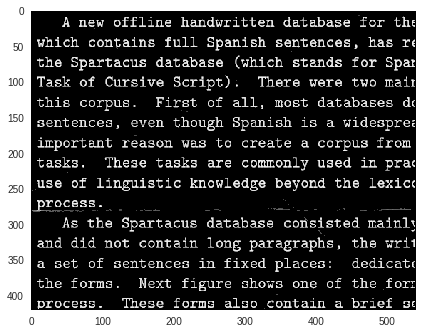

(48, 420, 540, 1)
decoded_imgs
(420, 540, 1)


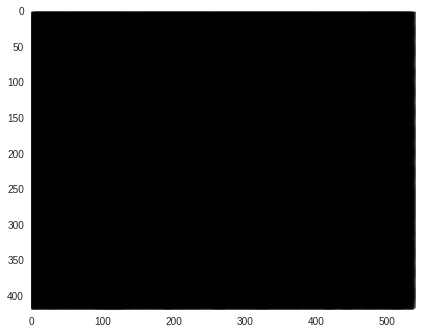

In [0]:
from matplotlib import pyplot as plt
from PIL import Image as Image
import numpy as np
def show_img_from_np(inp_array):
  from matplotlib import pyplot as plt
  first_array=inp_array
  #Not sure you even have to do that if you just want to visualize it
  first_array=255.*first_array
  first_array=first_array.astype("float64")
  print(first_array.shape)
  plt.imshow(first_array.reshape(420,540))
  plt.grid(False)
  plt.show()

# i=42,21,23,31,46,47
print(x_test.shape)
i=21
print('x_test')
show_img_from_np(x_test[i])
print(x_test.shape)
print('decoded_imgs')
show_img_from_np(decoded_imgs[i])

In [5]:
'''
  Function to convert images from dir to numpy arrays
'''
def img2nparray(path):
  from scipy import ndimage
  from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
  import os
  import numpy as np

  train_files = []
  y_train = []
  i=0
  #for _file in onlyfiles:
  for _file in os.listdir(path):
      train_files.append(_file)
  #     label_in_file = _file.find("_")
  #     y_train.append(int(_file[0:label_in_file]))

  print("Files in train_files: {}".format(len(train_files)))

  # Original Dimensions
  image_width = 540
  image_height = 258
  # ratio = 4

  # image_width = int(image_width / ratio)
  # image_height = int(image_height / ratio)

  # channels = 3
  channels = 1
  # nb_classes = 1

  dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),
                       dtype=np.float64)

  i = 0
  for _file in train_files:
      img = load_img(path + "/" + _file,grayscale=True)  # this is a PIL image
      img.thumbnail((image_width, image_height))
      # Convert to Numpy Array
      x = img_to_array(img)  
  #     x = x.reshape((3, 120, 160))
  #     # Normalize
  #     x = (x - 128.0) / 128.0
      x = x / 256.0
      print(_file)
      dataset[i] = x
      i += 1
      if i % 250 == 0:
          print("%d images to array" % i)
  print("All images to array!")
  return dataset

path='datalab/train_small'
X_train = img2nparray(path)
print(X_train.shape)

path='datalab/train_cleaned_small'
y_train = img2nparray(path)
print(y_train.shape)

path='datalab/test_small'
x_test = img2nparray(path)
print(x_test.shape)
print(x_test.dtype)

Using TensorFlow backend.


Files in train_files: 48
60.png
8.png
68.png
72.png
26.png
66.png
30.png
65.png
71.png
12.png
39.png
69.png
18.png
29.png
35.png
36.png
45.png
32.png
63.png
42.png
3.png
51.png
50.png
33.png
57.png
15.png
17.png
11.png
6.png
23.png
48.png
41.png
53.png
38.png
2.png
21.png
62.png
54.png
44.png
24.png
56.png
59.png
14.png
27.png
5.png
9.png
20.png
47.png
All images to array!
(48, 258, 540, 1)
Files in train_files: 48
60.png
8.png
68.png
72.png
26.png
66.png
30.png
65.png
71.png
12.png
39.png
69.png
18.png
29.png
35.png
36.png
45.png
32.png
63.png
42.png
3.png
51.png
50.png
33.png
57.png
15.png
17.png
11.png
6.png
23.png
48.png
41.png
53.png
38.png
2.png
21.png
62.png
54.png
44.png
24.png
56.png
59.png
14.png
27.png
5.png
9.png
20.png
47.png
All images to array!
(48, 258, 540, 1)
Files in train_files: 24
67.png
7.png
4.png
55.png
37.png
10.png
34.png
28.png
40.png
64.png
22.png
61.png
19.png
25.png
43.png
58.png
70.png
1.png
16.png
49.png
31.png
13.png
52.png
46.png
All images to array!
(

In [0]:
# Upload the file to Drive. See:
#
# https://developers.google.com/drive/v3/reference/files/create
# https://developers.google.com/drive/v3/web/manage-uploads
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build
def save_file_to_drive(name, path):
  drive_service = build('drive', 'v3')
  file_metadata = {
  'name': name,
  'mimeType': 'application/octet-stream'
  }
  media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media,fields='id').execute()
  print('File ID: {}'.format(created.get('id')))
  return created

save_file_to_drive('median_cnn200epoch_258_540.csv','/content/median_cnn200epoch_258_540.csv')
save_file_to_drive('median_cnn200epoch_420_540.csv','/content/median_cnn200epoch_420_540.csv')
!ls

File ID: 1y7w718_4ypERURgyteZxZ6E8fuhPdU00
File ID: 1N9FKSb-uleBgOEu47NgZOzNWNk_DNb8l
datalab       median_cnn200epoch_258_540.csv  my_model_weights.h5
datalab_orig  median_cnn200epoch_420_540.csv  tb


## Below all the trial functions junked after final solution

In [0]:
def check_number_of_pixels_imgdir(in_path):
  '''
  Number of Predictions (mandated by competition):
  We expect the solution file to have 14230080 prediction rows. This file should have a header row. Please see sample submission file on the data page.
  Below function calculates total entries arrived at using formula = (#images*img.shape[0]*img.shape[1])
  '''
  
  import os
  
  t=0
  for f in os.listdir(in_path):    
    img = np.asarray(Image.open(out_path))
    t += img.shape[0]*img.shape[1]
  return t

tick=time.time()
print(check_number_of_pixels_imgdir('test_op/'))
tock=time.time()
print('time taken: '+str(tock-tick))

16329600
time taken: 0.46344494819641113
total 7368
-rw-r--r-- 1 root root 151594 Jun 20 13:32 100.png
-rw-r--r-- 1 root root 160977 Jun 20 13:32 103.png
-rw-r--r-- 1 root root 153190 Jun 20 13:32 106.png
-rw-r--r-- 1 root root 155287 Jun 20 13:32 109.png
-rw-r--r-- 1 root root 146144 Jun 20 13:32 112.png
-rw-r--r-- 1 root root 156257 Jun 20 13:32 115.png
-rw-r--r-- 1 root root 148217 Jun 20 13:32 118.png
-rw-r--r-- 1 root root 157995 Jun 20 13:32 121.png
-rw-r--r-- 1 root root 148457 Jun 20 13:32 124.png
-rw-r--r-- 1 root root 159234 Jun 20 13:32 127.png
-rw-r--r-- 1 root root 150525 Jun 20 13:32 130.png
-rw-r--r-- 1 root root 154069 Jun 20 13:32 133.png
-rw-r--r-- 1 root root 144109 Jun 20 13:32 136.png
-rw-r--r-- 1 root root 155563 Jun 20 13:32 139.png
-rw-r--r-- 1 root root 146713 Jun 20 13:32 142.png
-rw-r--r-- 1 root root 162468 Jun 20 13:32 145.png
-rw-r--r-- 1 root root 155978 Jun 20 13:32 148.png
-rw-r--r-- 1 root root 163517 Jun 20 13:32 151.png
-rw-r--r-- 1 root root 157709 

In [0]:
'''
  Trasnform the resized np array for images with original size 258x540
'''
from skimage import img_as_float
from skimage.transform import resize
from skimage.io import imsave
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import os 

def resize_array(inp_array):
  print('Input shape: {}'.format(inp_array.shape))
  arr_resized = np.empty([inp_array.shape[0], 258, 540, 1], dtype=float)
  for i in range(inp_array.shape[0]):
    bottle_resized = resize(img_as_float(inp_array[i]), (258, 540),preserve_range=True)
  #   tmp[i] = np.stack((bottle_resized),axis=0)
    arr_resized[i] = (bottle_resized)
  return arr_resized

decoded_imgs_b_resized = resize_array(decoded_imgs_b)
print('Output shape: {}:'.format(decoded_imgs_b_resized.shape))
# x_test1 = np.append(x_test,o1,axis=0)
# print('Appended array shape: {}:'.format(x_test1.shape))


Input shape: (24, 420, 540, 1)
Output shape: (24, 258, 540, 1):


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


autoencoder_unprocessed_all_420_540.csv  datalab  datalab_orig	tb
96
(258, 540, 1)


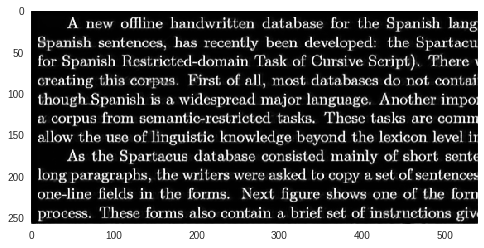

In [0]:
'''
  See random images from *small dir & verify sizes for all
'''
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import os

!ls
!ls datalab/train | wc -l
# !mkdir datalab/test_small_resized
# !mv *.png datalab/test_small_resized

first_array=decoded_imgs_b_resized[0]
first_array=255.*first_array
first_array=first_array.astype("float64")
print(first_array.shape)
plt.imshow(first_array.reshape(258,540))
plt.grid(False)
plt.show()

# img = cv2.imread('/content/datalab/train_small/11.png',0)
# print(img.shape)
# plt.imshow(img)
# plt.show()

# TARGET_DIR=Path(os.path.join(os.getcwd(),Path("datalab/test_small")))
# for i in TARGET_DIR.iterdir():
#   print(i)
#   img = cv2.imread(str(i),0)
#   print(img.shape)

In [0]:
!ls

def csv2np1(input_csv):
  import numpy as np
  return np.genfromtxt(input_csv,delimiter=',')

import time
def csv2np(input_csv):
  '''
  using csv module to read data & np.asarray method to covert to numpy array is 10X faster than using np.genfromtxt()
  '''
  import csv
  import numpy as np
  with open(input_csv,'r') as dest_f:
      data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
      data = [data for data in data_iter]
  np_array = np.asarray(data, dtype = float)    
  return np_array

tick=time.time()
#y_train = csv2np('/content/train_cleaned.csv')
y_train1 = csv2np1('/content/train_cleaned.csv')
tock=time.time()
print(tock-tick)
#X_train = csv2np('/content/train.csv')
X_train1 = csv2np1('/content/train.csv')
tock=time.time()
print(tock-tick)

datalab  train_cleaned.csv  train.csv
125.94951009750366
258.1544303894043


In [0]:
#JUNK
from skimage import io
all_images = np.empty((144,540,240,1))
t=0
for image_path in os.listdir(path):
  img = io.imread(path+image_path , as_grey=True)
  WIDTH = img.shape[0]
  HEIGHT = img.shape[1]
  img = img.reshape([WIDTH, HEIGHT, 1])
  #print(img[1,1,0])
  #all_images.append(img)
  np.append(all_images, img)
#   all_images[t,] = img
#   t+=1
x_train = np.array(all_images)
print(type(x_train))
print(all_images.shape)

<class 'numpy.ndarray'>
(144, 540, 240, 1)


In [0]:
'''
Evaluate image resizing using different libraries
subplot: to show images side-by-side
'''

from skimage import img_as_float
from skimage.transform import resize
from skimage.io import imsave
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
import os 

# Using image as input to resize
# TARGET_DIR=Path(os.path.join(os.getcwd(),Path("datalab/test_small")))
# for i in TARGET_DIR.iterdir():
#   img = cv2.imread(str(i),0)
#   plt.grid(False)
#   plt.imshow(img)
#   plt.show()
#   print(img.shape)
#   bottle_resized = resize(img, (420, 540),preserve_range=True)
#   file = str(i).split('/')[4]
#   plt.imshow(bottle_resized)
#   plt.show()

# using subplots to display images
#   fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
#   ax = axes.ravel()
#   plt.grid(False)
#   ax[0].imshow(img, cmap='gray')
#   ax[0].set_title("Original image")
#   ax[1].imshow(bottle_resized, cmap='gray')
#   ax[1].set_title("Re-sized")
#   plt.tight_layout()
#   plt.show()
#   imsave(file,bottle_resized)

#using ndarray to resize
# plt.imshow(x_test_small[1].reshape(258,540))
# plt.grid(False)
# plt.show()
# print(x_test_small.shape)
# print(x_test_small.dtype)
# print(x_test_small[1])
# bottle_resized = resize(img_as_float(x_test_small[1]), (420, 540),preserve_range=True)
# plt.imshow(bottle_resized[1].reshape(258,540))
# print(bottle_resized.shape)
# print(bottle_resized.dtype)
# print(bottle_resized)
def resize_array(inp_array):
  print('Input shape: {}'.format(inp_array.shape))
  arr_resized = np.empty([inp_array.shape[0], 420, 540, 1], dtype=float)
  for i in range(inp_array.shape[0]):
    bottle_resized = resize(img_as_float(inp_array[i]), (420, 540),preserve_range=True)
  #   tmp[i] = np.stack((bottle_resized),axis=0)
    arr_resized[i] = (bottle_resized)
  return arr_resized

o1 = resize_array(x_test_small)
print('Output shape: {}:'.format(o1.shape))
x_test1 = np.append(x_test,o1,axis=0)
print('Appended array shape: {}:'.format(x_test1.shape))

o2 = resize_array(X_train_small)
print('Output shape: {}:'.format(o2.shape))
X_train1 = np.append(X_train,o2,axis=0)
print('Appended array shape: {}:'.format(X_train1.shape))

o3 = resize_array(y_train_small)
print('Output shape: {}:'.format(o3.shape))
y_train1 = np.append(y_train,o3,axis=0)
print('Appended array shape: {}:'.format(y_train1.shape))

Input shape: (24, 258, 540, 1)


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Output shape: (24, 420, 540, 1):
Appended array shape: (72, 420, 540, 1):
Input shape: (48, 258, 540, 1)
Output shape: (48, 420, 540, 1):
Appended array shape: (144, 420, 540, 1):
Input shape: (48, 258, 540, 1)
Output shape: (48, 420, 540, 1):
Appended array shape: (144, 420, 540, 1):


In [0]:
import numpy as np
def linear_reg_keras(X_train, y_train, y_test, epoch=10, bsize=16):
  from keras.models import Sequential
  from keras.layers.core import Dense, Activation
  model = Sequential()
#   model.add(Dense(2,1,init='uniform', activation='linear'))
  model.add(Dense(32, input_dim=(28460160,)))
  model.add(Activation('linear'))
  model.summary()

  model.compile(loss='mse', optimizer='rmsprop')

  model.fit(X_train, y_train, epochs=epoch, batch_size=bsize, verbose=1)
  score = model.evaluate(X_test, y_test, bsize=16)

def lin_reg1(x,y):
  from keras.layers import Input, Dense
  from keras.models import Model

  inputs = Input(shape=(1,))
  preds = Dense(1,activation='linear')(inputs)

  model = Model(inputs=inputs,outputs=preds)
  model.summary()
  #sgd=keras.optimizers.SGD()
  model.compile(optimizer='rmsprop' ,loss='mse',metrics=['mse'])
  model.fit(x,y, batch_size=32, epochs=3, shuffle=True)

x=np.transpose(X_train1[:,1])
y=np.transpose(y_train1[:,1])
print(y.shape)
print(x.shape)
print(type(x))

#linear_reg_keras(x, y, x, epoch=1)
lin_reg1(x,y)

(28460160,)
(28460160,)
<class 'numpy.ndarray'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
   51744/28460160 [..............................] - ETA: 1:22:31 - loss: 0.0112 - mean_squared_error: 0.0112

  422912/28460160 [..............................] - ETA: 1:02:32 - loss: 0.0091 - mean_squared_error: 0.0091

  792640/28460160 [..............................] - ETA: 1:00:35 - loss: 0.0090 - mean_squared_error: 0.0090

 1169408/28460160 [>.............................] - ETA: 59:13 - loss: 0.0089 - mean_squared_error: 0.0089

 1551520/28460160 [>.............................] - ETA: 58:01 - loss: 0.0089 - mean_squared_error: 0.0089

 1930304/28460160 [=>............................] - ETA: 57:04 - loss: 0.0089 - mean_squared_error: 0.0089

 2316224/28460160 [=>............................] - ETA: 55:58 - loss: 0.0089 - mean_squared_error: 0.0089

 2697216/28460160 [=>............................] - ETA: 55:04 - loss: 0.0089 - mean_squared_error: 0.0089

 3082880/28460160 [==>...........................] - ETA: 54:06 - loss: 0.0089 - mean_squared_error: 0.0089

 3464000/28460160 [==>...........................] - ETA: 53:14 - loss: 0.0089 - mean_squared_error: 0.0089

 3845760/28460160 [===>..........................] - ETA: 52:23 - loss: 0.0088 - mean_squared_error: 0.0088

 4223744/28460160 [===>..........................] - ETA: 51:35 - loss: 0.0089 - mean_squared_error: 0.0089

 4600096/28460160 [===>..........................] - ETA: 50:49 - loss: 0.0088 - mean_squared_error: 0.0088

 4981696/28460160 [====>.........................] - ETA: 49:58 - loss: 0.0088 - mean_squared_error: 0.0088

 5358112/28460160 [====>.........................] - ETA: 49:12 - loss: 0.0088 - mean_squared_error: 0.0088

 5733952/28460160 [=====>........................] - ETA: 48:26 - loss: 0.0088 - mean_squared_error: 0.0088

 6111488/28460160 [=====>........................] - ETA: 47:39 - loss: 0.0088 - mean_squared_error: 0.0088

 6489952/28460160 [=====>........................] - ETA: 46:50 - loss: 0.0088 - mean_squared_error: 0.0088

 6864512/28460160 [======>.......................] - ETA: 46:04 - loss: 0.0088 - mean_squared_error: 0.0088

 7240608/28460160 [======>.......................] - ETA: 45:17 - loss: 0.0088 - mean_squared_error: 0.0088

 7616448/28460160 [=======>......................] - ETA: 44:29 - loss: 0.0088 - mean_squared_error: 0.0088

 7994048/28460160 [=======>......................] - ETA: 43:41 - loss: 0.0088 - mean_squared_error: 0.0088

 8361728/28460160 [=======>......................] - ETA: 42:58 - loss: 0.0088 - mean_squared_error: 0.0088

 8731776/28460160 [========>.....................] - ETA: 42:12 - loss: 0.0088 - mean_squared_error: 0.0088

 9106496/28460160 [========>.....................] - ETA: 41:25 - loss: 0.0088 - mean_squared_error: 0.0088

 9482368/28460160 [========>.....................] - ETA: 40:37 - loss: 0.0088 - mean_squared_error: 0.0088

 9856608/28460160 [=========>....................] - ETA: 39:50 - loss: 0.0088 - mean_squared_error: 0.0088

10233440/28460160 [=========>....................] - ETA: 39:01 - loss: 0.0088 - mean_squared_error: 0.0088

10611264/28460160 [==========>...................] - ETA: 38:13 - loss: 0.0088 - mean_squared_error: 0.0088

10988000/28460160 [==========>...................] - ETA: 37:24 - loss: 0.0088 - mean_squared_error: 0.0088

11363008/28460160 [==========>...................] - ETA: 36:37 - loss: 0.0088 - mean_squared_error: 0.0088

11738144/28460160 [===========>..................] - ETA: 35:49 - loss: 0.0088 - mean_squared_error: 0.0088

12111200/28460160 [===========>..................] - ETA: 35:01 - loss: 0.0088 - mean_squared_error: 0.0088

12488192/28460160 [============>.................] - ETA: 34:13 - loss: 0.0088 - mean_squared_error: 0.0088

12863488/28460160 [============>.................] - ETA: 33:25 - loss: 0.0088 - mean_squared_error: 0.0088

13241792/28460160 [============>.................] - ETA: 32:36 - loss: 0.0088 - mean_squared_error: 0.0088

13619040/28460160 [=============>................] - ETA: 31:48 - loss: 0.0088 - mean_squared_error: 0.0088

13995232/28460160 [=============>................] - ETA: 30:59 - loss: 0.0088 - mean_squared_error: 0.0088

14371680/28460160 [==============>...............] - ETA: 30:11 - loss: 0.0088 - mean_squared_error: 0.0088

14748064/28460160 [==============>...............] - ETA: 29:23 - loss: 0.0088 - mean_squared_error: 0.0088

15121216/28460160 [==============>...............] - ETA: 28:35 - loss: 0.0088 - mean_squared_error: 0.0088

15496320/28460160 [===============>..............] - ETA: 27:47 - loss: 0.0088 - mean_squared_error: 0.0088

15872384/28460160 [===============>..............] - ETA: 26:59 - loss: 0.0088 - mean_squared_error: 0.0088

16247808/28460160 [================>.............] - ETA: 26:11 - loss: 0.0088 - mean_squared_error: 0.0088

16623680/28460160 [================>.............] - ETA: 25:22 - loss: 0.0088 - mean_squared_error: 0.0088

16998560/28460160 [================>.............] - ETA: 24:34 - loss: 0.0088 - mean_squared_error: 0.0088

17372064/28460160 [=================>............] - ETA: 23:46 - loss: 0.0088 - mean_squared_error: 0.0088

17745824/28460160 [=================>............] - ETA: 22:59 - loss: 0.0088 - mean_squared_error: 0.0088

18118912/28460160 [==================>...........] - ETA: 22:11 - loss: 0.0088 - mean_squared_error: 0.0088

18490208/28460160 [==================>...........] - ETA: 21:23 - loss: 0.0088 - mean_squared_error: 0.0088

18860864/28460160 [==================>...........] - ETA: 20:36 - loss: 0.0088 - mean_squared_error: 0.0088

19237408/28460160 [===================>..........] - ETA: 19:47 - loss: 0.0088 - mean_squared_error: 0.0088

19614240/28460160 [===================>..........] - ETA: 18:59 - loss: 0.0088 - mean_squared_error: 0.0088

19990976/28460160 [====================>.........] - ETA: 18:10 - loss: 0.0088 - mean_squared_error: 0.0088

20364992/28460160 [====================>.........] - ETA: 17:22 - loss: 0.0088 - mean_squared_error: 0.0088

20738752/28460160 [====================>.........] - ETA: 16:34 - loss: 0.0088 - mean_squared_error: 0.0088

21113728/28460160 [=====================>........] - ETA: 15:46 - loss: 0.0088 - mean_squared_error: 0.0088

21488608/28460160 [=====================>........] - ETA: 14:58 - loss: 0.0088 - mean_squared_error: 0.0088

21813920/28460160 [=====================>........] - ETA: 14:16 - loss: 0.0088 - mean_squared_error: 0.0088

In [0]:
import time
import csv
img_no=1
tick=time.time()
for f in os.listdir('test_op/'):
  out_path='test_op/'+str(f)
  img = np.asarray(Image.open(out_path))/255.0
  print('writing img#{} to csv'.format(img_no))
  for index in np.ndindex(img.shape[:]):    
    with open('mix.csv', 'a') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
        writer.writerow( [ str(f.split('.')[0])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(img[index[0],index[1]]) ] )
  img_no+=1
  tock1=time.time()
  print('time to copy {}: {}'.format(f,str(tock1-tick)))
#   if img_no > 1:
#     break
tock=time.time()
print('time taken: '+str(tock-tick))


writing img#1 to csv
time to copy 139.png: 19.046212434768677
writing img#2 to csv
time to copy 208.png: 37.7044460773468
writing img#3 to csv
time to copy 124.png: 56.12141466140747
writing img#4 to csv
time to copy 52.png: 67.40902614593506
writing img#5 to csv
time to copy 34.png: 78.93252611160278
writing img#6 to csv
time to copy 148.png: 98.6608555316925
writing img#7 to csv
time to copy 7.png: 110.80612754821777
writing img#8 to csv
time to copy 43.png: 123.15857148170471
writing img#9 to csv
time to copy 145.png: 143.55552458763123
writing img#10 to csv
time to copy 19.png: 156.26391124725342
writing img#11 to csv
time to copy 211.png: 176.9255428314209
writing img#12 to csv
time to copy 64.png: 188.86388206481934
writing img#13 to csv
time to copy 103.png: 207.67635464668274
writing img#14 to csv
time to copy 202.png: 226.31746435165405
writing img#15 to csv
time to copy 46.png: 237.6920382976532
writing img#16 to csv
time to copy 112.png: 256.1651451587677
writing img#17 to c

time to copy 127.png: 935.624433517456
writing img#58 to csv
time to copy 130.png: 955.9474806785583
writing img#59 to csv
time to copy 136.png: 975.4132404327393
writing img#60 to csv
time to copy 94.png: 994.7887065410614
writing img#61 to csv
time to copy 142.png: 1013.6540644168854
writing img#62 to csv
time to copy 196.png: 1032.2470948696136
writing img#63 to csv
time to copy 106.png: 1050.978933095932
writing img#64 to csv
time to copy 97.png: 1070.7883684635162
writing img#65 to csv
time to copy 4.png: 1083.2243268489838
writing img#66 to csv
time to copy 61.png: 1095.5931296348572
writing img#67 to csv
time to copy 163.png: 1117.203075170517
writing img#68 to csv
time to copy 28.png: 1130.1534895896912
writing img#69 to csv
time to copy 118.png: 1152.0264854431152
writing img#70 to csv
time to copy 121.png: 1172.6309924125671
writing img#71 to csv
time to copy 91.png: 1191.31014752388
writing img#72 to csv
time to copy 88.png: 1209.7989268302917
time taken: 1209.7996008396149


In [0]:
'''
  flattening & tagging pixel intensities to image index 
'''
file_list=(139,208,124,148,145,211,103,202,112,76,199,166,79,172,73,178,169,82,181,190,151,205,160,175,157,187,214,85,193,133,100,109,154,115,184,127,130,136,94,142,196,106,97,163,118,121,91,88)
print(len(file_list))
# for x in file_list:
#   print(x)
import numpy as np
out=(decoded_imgs.reshape(48,420,540))
print(np.ndindex(out.shape))
print(out[1,1,1])
t=0
for x in range(len(file_list)):
  c = out[x,:,:]
  print(c)
  for index in np.ndindex(c.shape[:]):    
    print(index)
    print([ str(file_list[t])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(out[t,index[0],index[1]]) ])
    t += 1


48
0.99959415
[[0.98633456 0.9981232  0.9985129  ... 0.92079175 0.8283129  0.67424154]
 [0.99600935 0.9994649  0.9995832  ... 0.9732853  0.8951849  0.7526121 ]
 [0.9984452  0.9999006  0.9999372  ... 0.9968123  0.97759354 0.87963957]
 ...
 [0.91150194 0.98989886 0.9955042  ... 0.9865129  0.90657157 0.6848021 ]
 [0.86888677 0.9769807  0.9891495  ... 0.97592247 0.88807225 0.7111431 ]
 [0.7579126  0.9188984  0.9523346  ... 0.9436614  0.86525446 0.71400636]]
(0, 0)
['139_1_1', '0.98633456']
(0, 1)
['208_1_2', '0.9984503']
(0, 2)
['124_1_3', '0.9988451']
(0, 3)
['148_1_4', '0.99865687']
(0, 4)
['145_1_5', '0.99793905']
(0, 5)
['211_1_6', '0.99581486']
(0, 6)
['103_1_7', '0.99598086']
(0, 7)
['202_1_8', '0.9945042']
(0, 8)
['112_1_9', '0.9944916']
(0, 9)
['76_1_10', '0.9945879']
(0, 10)
['199_1_11', '0.99538994']
(0, 11)
['166_1_12', '0.9898537']
(0, 12)
['79_1_13', '0.9955069']
(0, 13)
['172_1_14', '0.9955751']
(0, 14)
['73_1_15', '0.99563545']
(0, 15)
['178_1_16', '0.9921389']
(0, 16)
['169

IndexError: ignored

In [0]:
'''
Understanding vstack & hstack
'''
import numpy as np
a = np.array([[1,2], [3,4]])
print(a.shape)
print(a.flatten().shape)
print(a)
print(a.flatten())
print(type(a.flatten()))
b=np.full((3,4),2.5)
print(b)
print('***********************')
a = np.array([[1,2],[2,4],[3,3]])
print(a.shape)
print(a)
b = np.array([[2,4],[3,7],[4,1]])
print(b.shape)
print(b)
print(np.hstack((a,b)))
print(np.hstack((a,b)).shape)
print(a.reshape((1,-1)).shape)
a.reshape((1,-1))

(2, 2)
(4,)
[[1 2]
 [3 4]]
[1 2 3 4]
<class 'numpy.ndarray'>
[[2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5]
 [2.5 2.5 2.5 2.5]]
***********************
(3, 2)
[[1 2]
 [2 4]
 [3 3]]
(3, 2)
[[2 4]
 [3 7]
 [4 1]]
[[1 2 2 4]
 [2 4 3 7]
 [3 3 4 1]]
(3, 4)
(1, 6)


array([[1, 2, 2, 4, 3, 3]])

In [0]:
'''
  Random forrest solution
'''
# !pip install joblib
import concurrent.futures
import csv
import logging
import random

import joblib
import numpy as np
import sklearn.ensemble
import sklearn.cross_validation
import sklearn.metrics

import skimage.data

from pathlib import Path

from PIL import Image as image

TRAIN_DIR = Path("./datalab/train/")
TARGET_DIR = Path("./datalab/train_cleaned/")
TEST_DIR = Path("./datalab/test/")

CHUNKSIZE = 2000000

logging.basicConfig(level=logging.INFO)

def get_padded(imgarray, padding=1):
    padval = int(round(imgarray.flatten().mean()))
    rows, cols = imgarray.shape
    xpad = np.full((rows, padding), padval, dtype='uint8')
    ypad = np.full((padding, cols + 2 * padding), padval, dtype='uint8')
    return np.vstack((ypad, np.hstack((xpad, imgarray, xpad)), ypad))

def get_features_for_image(imgarray, padding=1):
    rows, cols = imgarray.shape
    padded = get_padded(imgarray, padding=padding)
    features = []
    return np.vstack(tuple(
        np.vstack(tuple(
            padded[i: i + 2 * padding + 1, j: j + 2 * padding + 1].reshape((1, -1))
            for j in range(cols)
        )) for i in range(rows)
    ))

def get_features_for_path(path, padding=1):
    return get_features_for_image(skimage.data.imread(str(path)), padding=padding)

def get_target_for_path(path):
    return skimage.data.imread(str(path)).flatten() / 255

def get_training_sets():
    X = list(joblib.Parallel(n_jobs=-1)(
        joblib.delayed(get_features_for_path)(i)
        for i in TRAIN_DIR.iterdir()))
    y = list(joblib.Parallel(n_jobs=-1)(
        joblib.delayed(get_target_for_path)(i)
        for i in TARGET_DIR.iterdir()))
    X = np.concatenate(X)
    y = np.concatenate(y)
    logging.info("Finished loading")
    return X, y

def get_model(X, y):
    model = sklearn.ensemble.RandomForestRegressor(
        n_estimators=0, warm_start=True, n_jobs=-1)
    indices = list(range(0, X.shape[0], CHUNKSIZE))
    indices.append(X.shape[0])
    for i in range(len(indices) - 1):
        if not (i + 1) % 10:
            logging.info("Fitting {} of {}".format(i + 1, len(indices) - 1))
        start, end = indices[i], indices[i + 1]
        model.set_params(n_estimators=model.get_params()["n_estimators"] + 1)
        model.fit(X[start: end], y[start: end])
    logging.info("Finished Training")
    return model

def get_index_and_features(path):
    imgarray = skimage.data.imread(str(path))
    X = get_features_for_image(imgarray)
    index = []
    for i in range(imgarray.shape[0]):
        for j in range(imgarray.shape[1]):
            index.append("{}_{}_{}".format(path.stem, i + 1, j + 1))
    return index, X

def get_test_set():
    index = []
    X = []
    for imgindex, imgfeatures in joblib.Parallel(n_jobs=-1)(
            joblib.delayed(get_index_and_features)(i)
            for i in TEST_DIR.iterdir()):
        index.extend(imgindex)
        X.append(imgfeatures)
    logging.info("Finished Loading Test Set")
    X = np.vstack(X)
    assert(len(index) == X.shape[0])
    return index, X


def write_submission(model, index, X, path):
    with path.open('w', encoding='utf-8', newline='') as outf:
        writer = csv.writer(outf)
        writer.writerow(('id', 'value'))
        writer.writerows(zip(index, model.predict(X)))
    

def main():
    trainX, trainy = get_training_sets()
    model = get_model(trainX, trainy)
    index, testX = get_test_set()
    write_submission(model, index, testX, Path("submission.csv"))
    
if __name__ == "__main__":
    main()

INFO:root:Finished loading
INFO:root:Fitting 10 of 15
INFO:root:Finished Training
INFO:root:Finished Loading Test Set


In [0]:
#@title Functions to download files from collab to local system/gdrive

def save_file_to_local(filename):
  '''
  files.download is useful for downloading small files from collab book to local drive. 
  Note: for bigger file size > 100MB, try storing file to google drive & download thereafter.
  '''
  
  from google.colab import files

  files.download(filename)
  
def save_file_to_gdrive(name, path):
  '''
  Upload the file to Drive. See:
  https://developers.google.com/drive/v3/reference/files/create
  https://developers.google.com/drive/v3/web/manage-uploads
  '''
  
  from googleapiclient.http import MediaFileUpload
  from googleapiclient.discovery import build
  
  drive_service = build('drive', 'v3')
  file_metadata = {
  'name': name,
  'mimeType': 'application/octet-stream'
  }
  media = MediaFileUpload(path, mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media,fields='id').execute()
  print('File ID: {}'.format(created.get('id')))
  return created

save_file_to_gdrive('train_cleaned.csv','/content/train_cleaned.csv')

adc.json
183_1_1,1.0
183_1_2,1.0
183_1_3,1.0
183_1_4,1.0
183_1_5,1.0
****
183_1_1,0.8901960784313725
183_1_2,0.8823529411764706
183_1_3,0.8980392156862745
183_1_4,0.8823529411764706
183_1_5,0.8705882352941177


In [0]:
#JUNK

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense, MaxPooling2D, UpSampling2D, AveragePooling2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU, PReLU, ThresholdedReLU
from keras import backend as K
from keras.callbacks import TensorBoard


# dimensions of our images.
img_width, img_height = 540, 420

X_train_data_dir = 'datalab/train'
y_train_data_dir = 'datalab/train_cleaned'
nb_train_samples = 144
epochs = 10
batch_size = 16

# this is the augmentation configuration we will use for training
X_train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
    )

# this is the augmentation configuration we will use for testing:
# only rescaling
y_train_datagen = ImageDataGenerator(rescale=1. / 255)

X_train_generator = X_train_datagen.flow_from_directory(
    X_train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input')

y_train_generator = y_train_datagen.flow_from_directory(
    y_train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='input')

# from PIL import Image
# im = Image.open("./datalab/test/52.png")
# print(im.format, im.size, im.mode)
# im.split()
# plt.grid(False)
# plt.imshow(np.asarray(im))

# im1 = Image.open("./test_op/91.png")
# print(im1.format, im.size, im.mode)
# im1.split()
# plt.imshow(np.asarray(im1))

!ls test_op

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
ls: cannot access 'test_op': No such file or directory


In [0]:
def img2csv(imgdir_path,csv_name):
  '''
  This function flattens input image(s) from provided path to array=>(pixel_id,pixel_intensity_value)
  '''
  import time
  import os
  import numpy as np
  from PIL import Image as Image
  import csv
  img_no=1
  tick=time.time()
  for f in os.listdir(imgdir_path):
    out_path=imgdir_path+str(f)
    img = np.asarray(Image.open(out_path))/255.0
    print('writing img#{} to csv'.format(img_no))
    for index in np.ndindex(img.shape[:]):    
      with open(csv_name, 'a') as csvfile:
          writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
          writer.writerow( [ str(f.split('.')[0])+'_'+str(index[0]+1)+'_'+str(index[1]+1) ]+[ str(img[index[0],index[1]]) ] )
    img_no+=1
    tock1=time.time()
    print('time to copy {}: {}'.format(f,str(tock1-tick)))
  tock=time.time()
  return 'time taken: '+str(tock-tick)

img2csv('datalab/train_cleaned/','train_cleaned.csv')

writing img#1 to csv
time to copy 183.png: 15.499060869216919
writing img#2 to csv
time to copy 56.png: 25.07726764678955
writing img#3 to csv
time to copy 92.png: 40.592365741729736
writing img#4 to csv
time to copy 32.png: 50.14067459106445
writing img#5 to csv
time to copy 50.png: 59.66117262840271
writing img#6 to csv
time to copy 182.png: 75.17591857910156
writing img#7 to csv
time to copy 110.png: 90.73227524757385
writing img#8 to csv
time to copy 105.png: 106.2534568309784
writing img#9 to csv
time to copy 138.png: 121.93554043769836
writing img#10 to csv
time to copy 99.png: 137.37348461151123
writing img#11 to csv
time to copy 62.png: 146.93444657325745
writing img#12 to csv
time to copy 59.png: 156.50678420066833
writing img#13 to csv
time to copy 108.png: 172.0984537601471
writing img#14 to csv
time to copy 12.png: 181.69309449195862
writing img#15 to csv
time to copy 119.png: 197.18895030021667
writing img#16 to csv
time to copy 155.png: 212.7899832725525
writing img#17 to

time to copy 65.png: 771.9516253471375
writing img#58 to csv
time to copy 213.png: 787.4093194007874
writing img#59 to csv
time to copy 83.png: 802.792445898056
writing img#60 to csv
time to copy 98.png: 818.5159742832184
writing img#61 to csv
time to copy 126.png: 833.9696080684662
writing img#62 to csv
time to copy 24.png: 843.4770398139954
writing img#63 to csv
time to copy 72.png: 852.9030067920685
writing img#64 to csv
time to copy 180.png: 868.3621077537537
writing img#65 to csv
time to copy 174.png: 883.8732032775879
writing img#66 to csv
time to copy 141.png: 899.2639937400818
writing img#67 to csv
time to copy 189.png: 914.6497993469238
writing img#68 to csv
time to copy 30.png: 924.1340477466583
writing img#69 to csv
time to copy 122.png: 939.6108891963959
writing img#70 to csv
time to copy 135.png: 954.9622447490692
writing img#71 to csv
time to copy 194.png: 970.2685871124268
writing img#72 to csv
time to copy 125.png: 985.6736679077148
writing img#73 to csv
time to copy 86

time to copy 216.png: 1522.0567195415497
writing img#114 to csv
time to copy 131.png: 1537.373825788498
writing img#115 to csv
time to copy 111.png: 1552.70428109169
writing img#116 to csv
time to copy 101.png: 1567.9181008338928
writing img#117 to csv
time to copy 74.png: 1583.119149684906
writing img#118 to csv
time to copy 96.png: 1598.2864394187927
writing img#119 to csv
time to copy 18.png: 1607.6615068912506
writing img#120 to csv
time to copy 75.png: 1622.9005699157715
writing img#121 to csv
time to copy 21.png: 1632.2765843868256
writing img#122 to csv
time to copy 200.png: 1647.5256667137146
writing img#123 to csv
time to copy 104.png: 1662.8447947502136
writing img#124 to csv
time to copy 150.png: 1678.1939792633057
writing img#125 to csv
time to copy 192.png: 1693.5271770954132
writing img#126 to csv
time to copy 132.png: 1708.8015356063843
writing img#127 to csv
time to copy 195.png: 1724.1345500946045
writing img#128 to csv
time to copy 38.png: 1733.5716261863708
writing i

'time taken: 1937.8511793613434'

In [0]:
#JUNK

# for f in os.listdir(imgdir_path):
#     out_path=imgdir_path+str(f)

#x = np.array([np.array(Image.open(fname)) for fname in filelist])
# path='/content/datalab/train/'
# x = [np.array(Image.open(path+f)) for f in os.listdir(path)]
# print(x.shape)

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
print(x_test[1].shape)
l = x_test[1]
print(l[0,0,0])
m = x_test[1].reshape(420,540)
print(m[0,0])
import csv
for n in range(x_test.shape[0]):
  for row in range(x_test.shape[1]):
    for col in range(x_test.shape[2]):
      m = x_test[n].reshape(420,540)
#         print('{}_{}_{},{}'.format(test_list[n],(row+1),(col+1),m[row,col]))
      with open('deep_autoenc.csv', 'a') as csvfile:
          writer = csv.writer(csvfile, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
          writer.writerow( [ str(test_list[n])+'_'+str(row+1)+'_'+str(col+1) ]+[ str(m[row,col]) ] )


(420, 540, 1)
0.93359375
0.93359375
